In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
from utils import *

In [2]:
%matplotlib inline

In [3]:
xtr, ytr = load_data("data/ex2data1.txt")

In [5]:
print(xtr[:5])
print(ytr[:5])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[0. 0. 0. 1. 1.]


In [6]:
print(xtr.shape)
print(ytr.shape)

(100, 2)
(100,)


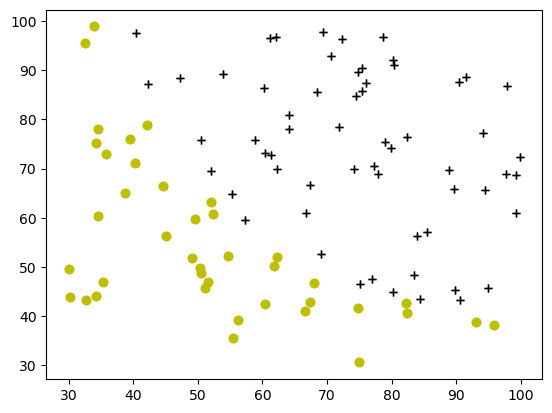

In [8]:
plot_data(xtr, ytr)
plt.show()

In [9]:
def sigmoid(z):
    g = 1 / (1+np.exp(-z))
    return g

In [10]:
sigmoid(0)

np.float64(0.5)

In [97]:
def compute_cost(x, y, w, b, *args):
    m, n = x.shape

    total_cost = 0

    for i in range(m):
        g = sigmoid(w.dot(x[i])+b)
        total_cost += (-y[i]*np.log(g)) - (1-y[i])*np.log(1-g)

    total_cost /= m
    
    return total_cost

In [106]:
m, n = xtr.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(xtr, ytr, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [107]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(xtr, ytr, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.218


In [108]:
def compute_gradient(x, y, w, b, *args):
   
    m, n = x.shape

    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        g = sigmoid(w.dot(x[i])+b)
        err = g - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i,j]
        dj_db += np.sum(err)

    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [110]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(xtr, ytr, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):[-12.00921659 -11.26284221]
dj_dw at initial w and b (zeros):-0.1


In [102]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_dw, dj_db  = compute_gradient(xtr, ytr, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

Inside gradient: x.shape=(100, 2), y.shape=(100,), w.shape=(2,)
w dtype: float64, x dtype: float64
dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]


In [111]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [112]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(xtr ,ytr, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


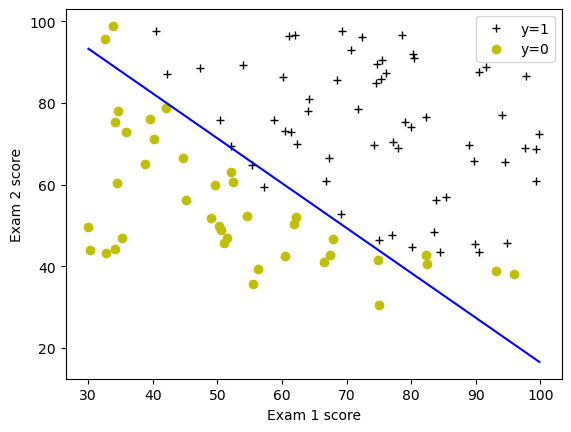

In [113]:
plot_decision_boundary(w, b, xtr, ytr)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [116]:
def predict(x, w, b):
    m = x.shape[0]
    p = np.zeros(m)
    for i in range(m):
        p[i] = sigmoid(w.dot(x[i])+b)
        if p[i] < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    return p

In [117]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


In [119]:
p = predict(xtr, w,b)
print('Train Accuracy: %f'%(np.mean(p == ytr) * 100))

Train Accuracy: 92.000000


### REGULARIZED LOGISTIC REGRESSION

In [120]:
xtr, ytr = load_data("data/ex2data2.txt")

In [121]:
print(xtr[:5])
print(ytr[:5])

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[1. 1. 1. 1. 1.]


In [122]:
print(xtr.shape)
print(ytr.shape)

(118, 2)
(118,)


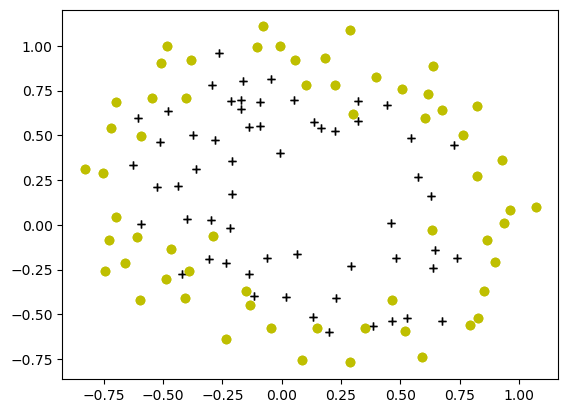

In [124]:
plot_data(xtr, ytr)
plt.show()

In [125]:
mapped_x = map_feature(xtr[:,0], xtr[:,1])
mapped_x.shape

(118, 27)

In [129]:
def compute_cost_reg(x, y, w, b, lambda_=1):
    total_cost = compute_cost(x, y, w, b)
    m, n = x.shape
    for j in range(n):
        total_cost += (lambda_/(2*m) * w[j]**2)
    
    return total_cost

In [130]:
np.random.seed(1)
initial_w = np.random.rand(mapped_x.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(mapped_x, ytr, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6618252552483946


In [131]:
def compute_gradient_reg(x, y, w, b, lambda_=1):
    dw, db = compute_gradient(x, y, w, b, 0)
    m, n = x.shape

    for j in range(n):
        dw[j] += (lambda_/m) * w[j]

    return dw, db

In [132]:
np.random.seed(1) 
initial_w  = np.random.rand(mapped_x.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_dw, dj_db = compute_gradient_reg(mapped_x, ytr, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.05362734632745741, 0.003140278267313462]


In [138]:
w, b, jh, ph = gradient_descent(mapped_x, ytr, initial_w, 1, compute_cost_reg, compute_gradient_reg, alpha=0.01, num_iters=10000, lambda_=0.01)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


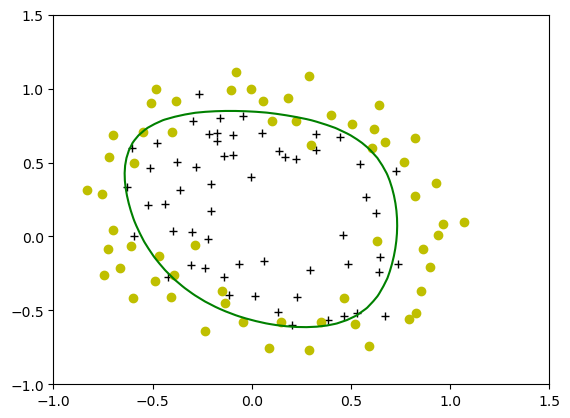

In [139]:
plot_decision_boundary(w, b, mapped_x, ytr)
plt.show()

In [141]:
p = predict(mapped_x, w, b)

f"{np.mean(p==ytr)*100}:0.2f")

SyntaxError: invalid decimal literal (2261988958.py, line 3)